In [4]:
from zipfile import ZipFile
zipfile_path = "/home/stranger/Desktop/Heart_Disease_Project/data/heart+disease.zip"
with ZipFile(zipfile_path, 'r') as zip_ref:
    zip_ref.extract('processed.cleveland.data', '.')

In [23]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [9]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]

data = pd.read_csv("/home/stranger/Desktop/Heart_Disease_Project/data/processed.cleveland.data", names=columns, header=None)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Heart Disease Dataset - Column Descriptions

| Column    | Description | Type | Values / Range |
|-----------|-------------|------|----------------|
| **age**       | Age of the patient | Numeric | Years |
| **sex**       | Sex of the patient | Categorical | 0 = Female, 1 = Male |
| **cp**        | Chest pain type | Categorical | 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic |
| **trestbps**  | Resting blood pressure | Numeric | mm Hg (at hospital admission) |
| **chol**      | Serum cholesterol | Numeric | mg/dl |
| **fbs**       | Fasting blood sugar | Binary | 0 = ≤120 mg/dl, 1 = >120 mg/dl |
| **restecg**   | Resting electrocardiographic results | Categorical | 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy |
| **thalach**   | Maximum heart rate achieved | Numeric | bpm |
| **exang**     | Exercise-induced angina | Binary | 0 = No, 1 = Yes |
| **oldpeak**   | ST depression induced by exercise relative to rest | Numeric | Float value |
| **slope**     | Slope of the peak exercise ST segment | Categorical | 0 = Upsloping, 1 = Flat, 2 = Downsloping |
| **ca**        | Number of major vessels colored by fluoroscopy | Numeric | 0–3 |
| **thal**      | Thalassemia test result | Categorical | 0 = Normal, 1 = Fixed defect, 2 = Reversible defect |
| **target**    | Diagnosis of heart disease | Binary | 0 = No disease, 1 = Disease present |


In [11]:
#check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [13]:
# check the missing data
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
#check the data types
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object


In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
le =LabelEncoder()

# Encode 'ca' column
data["ca_encoded"] = le.fit_transform(data["ca"])

# Encode 'thal' column
data["thal_encoded"] = le.fit_transform(data["thal"])

In [28]:
data.drop(columns=["ca", "thal"], inplace=True)

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


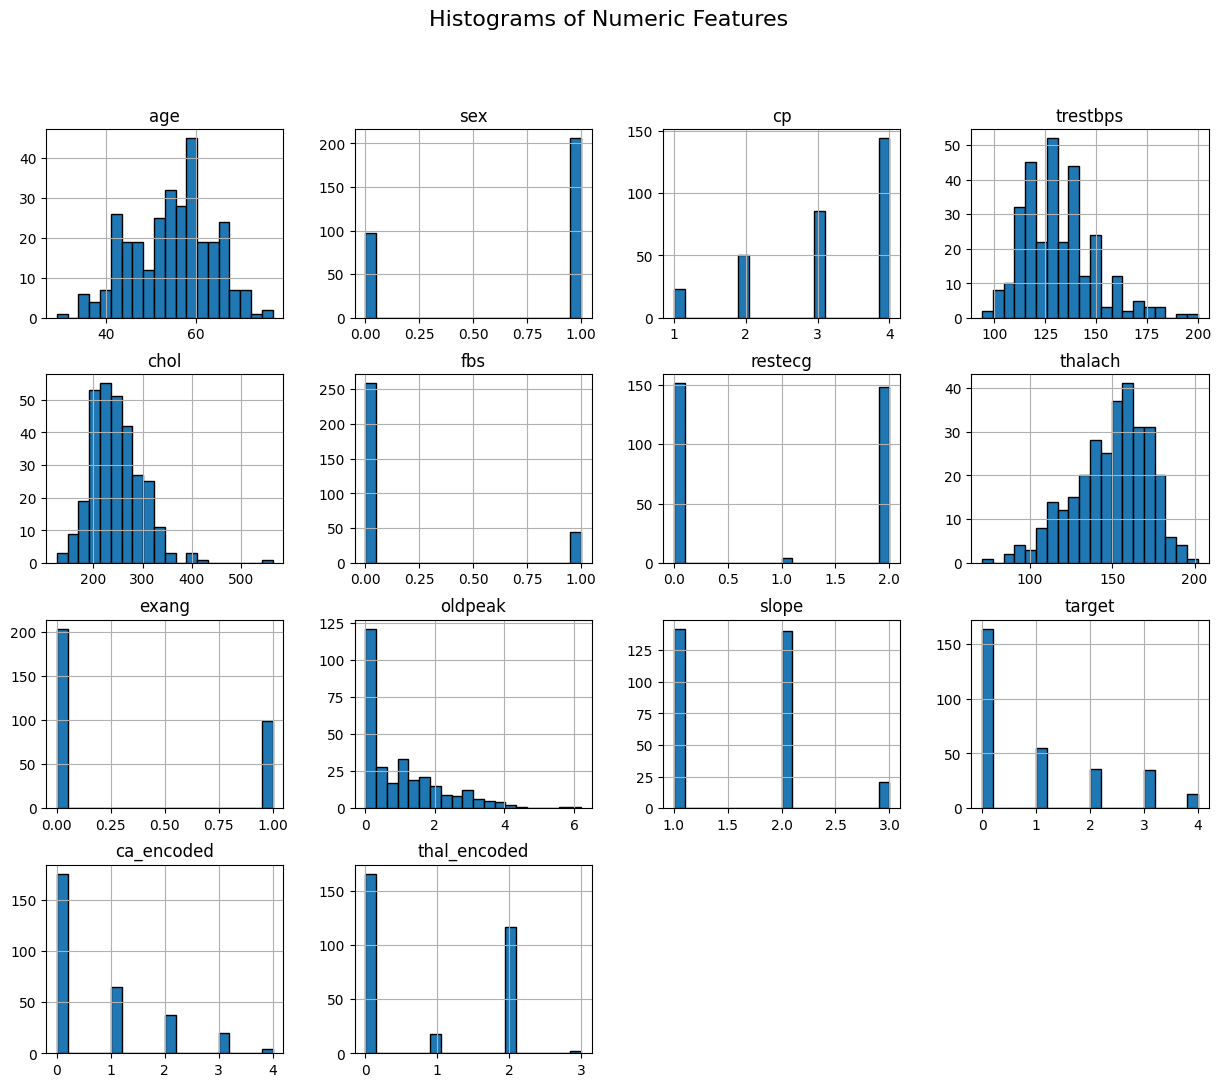

In [31]:
# 1️⃣ Histograms for all numeric columns
data.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


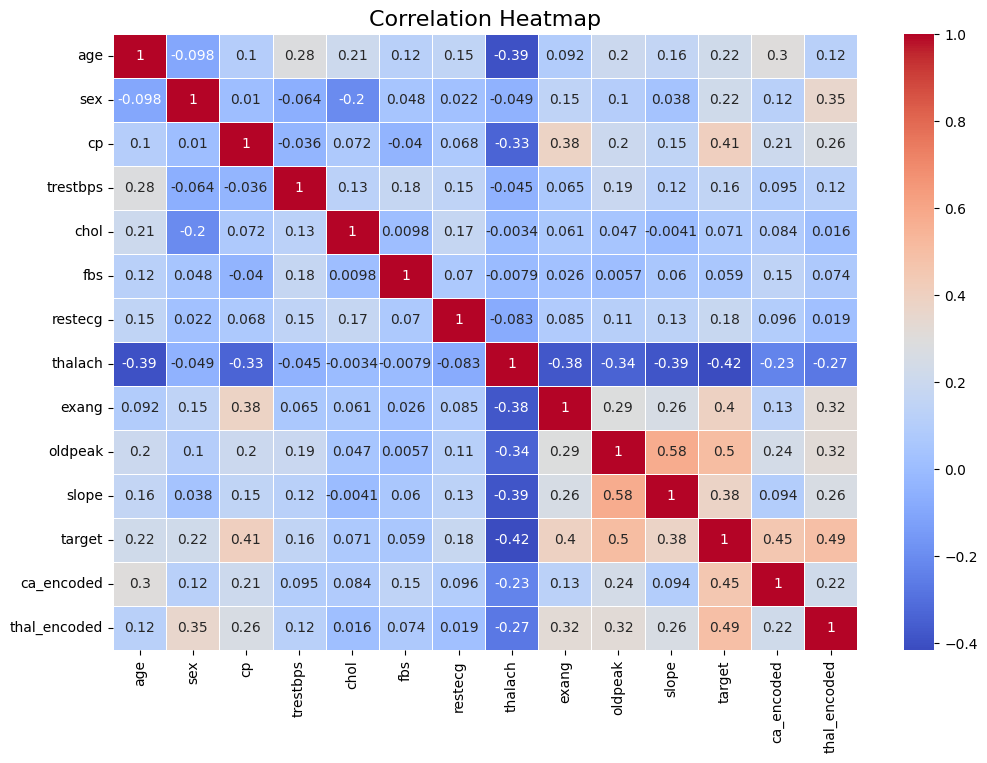

In [32]:
# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


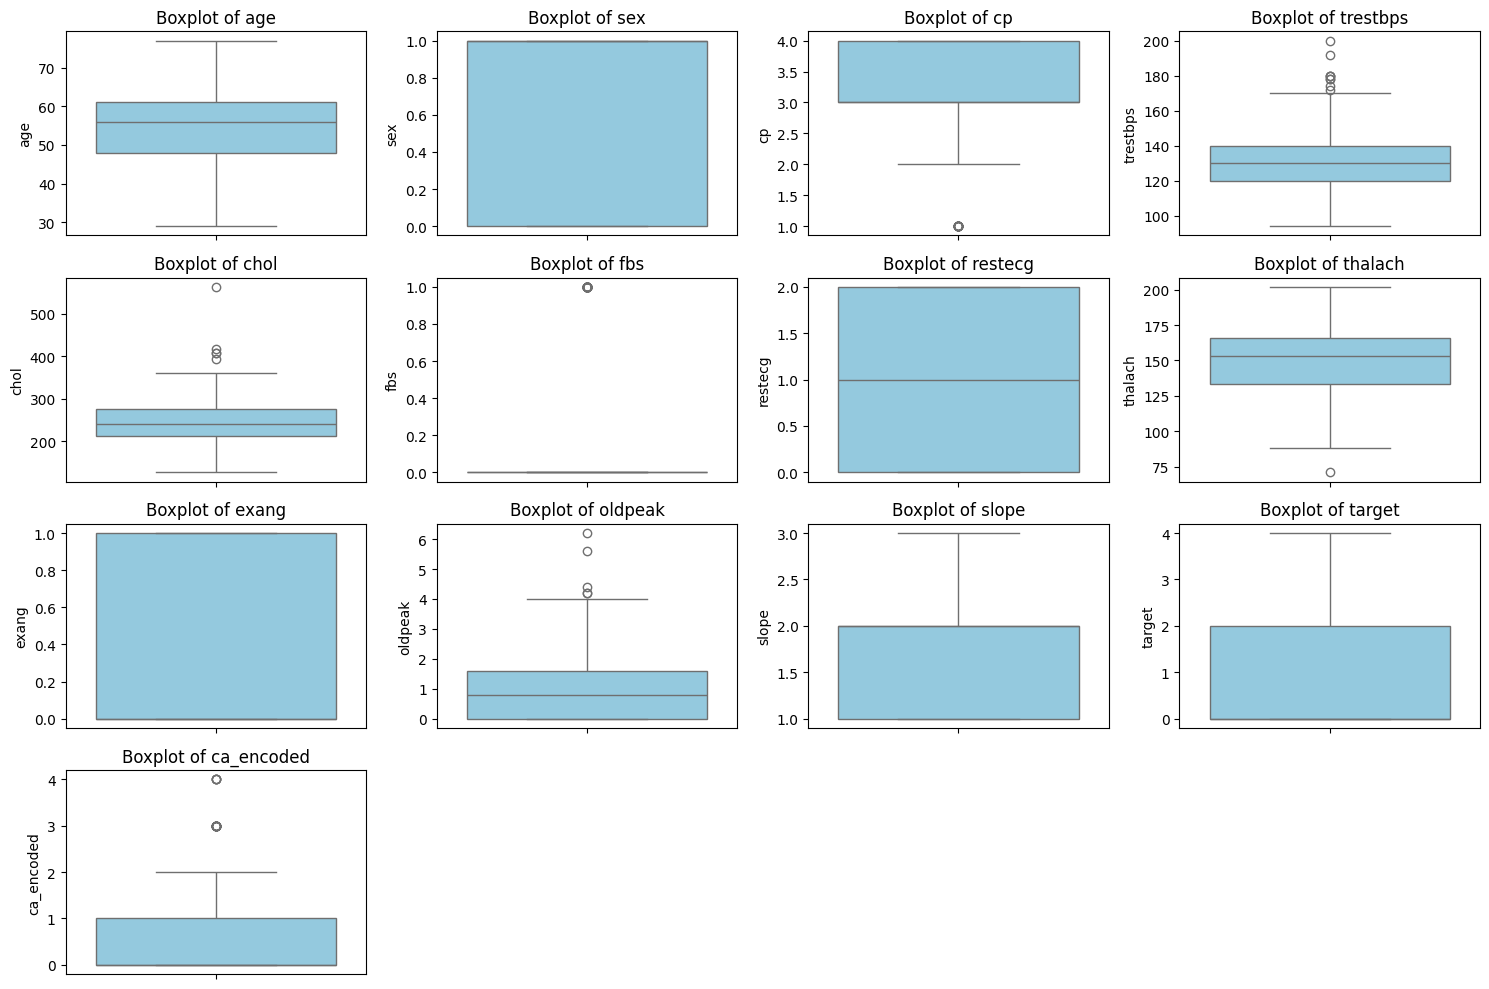

In [33]:
# 3️⃣ Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  # skip 'target'
    plt.subplot(4, 4, i)   # adjust grid based on number of features
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


/tmp/ipykernel_24724/2607056630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=data, palette="Set2")
/tmp/ipykernel_24724/2607056630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=data, palette="Set2")
/tmp/ipykernel_24724/2607056630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=data, palette="Set2")
/tmp/ipykernel_24724/2607056630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

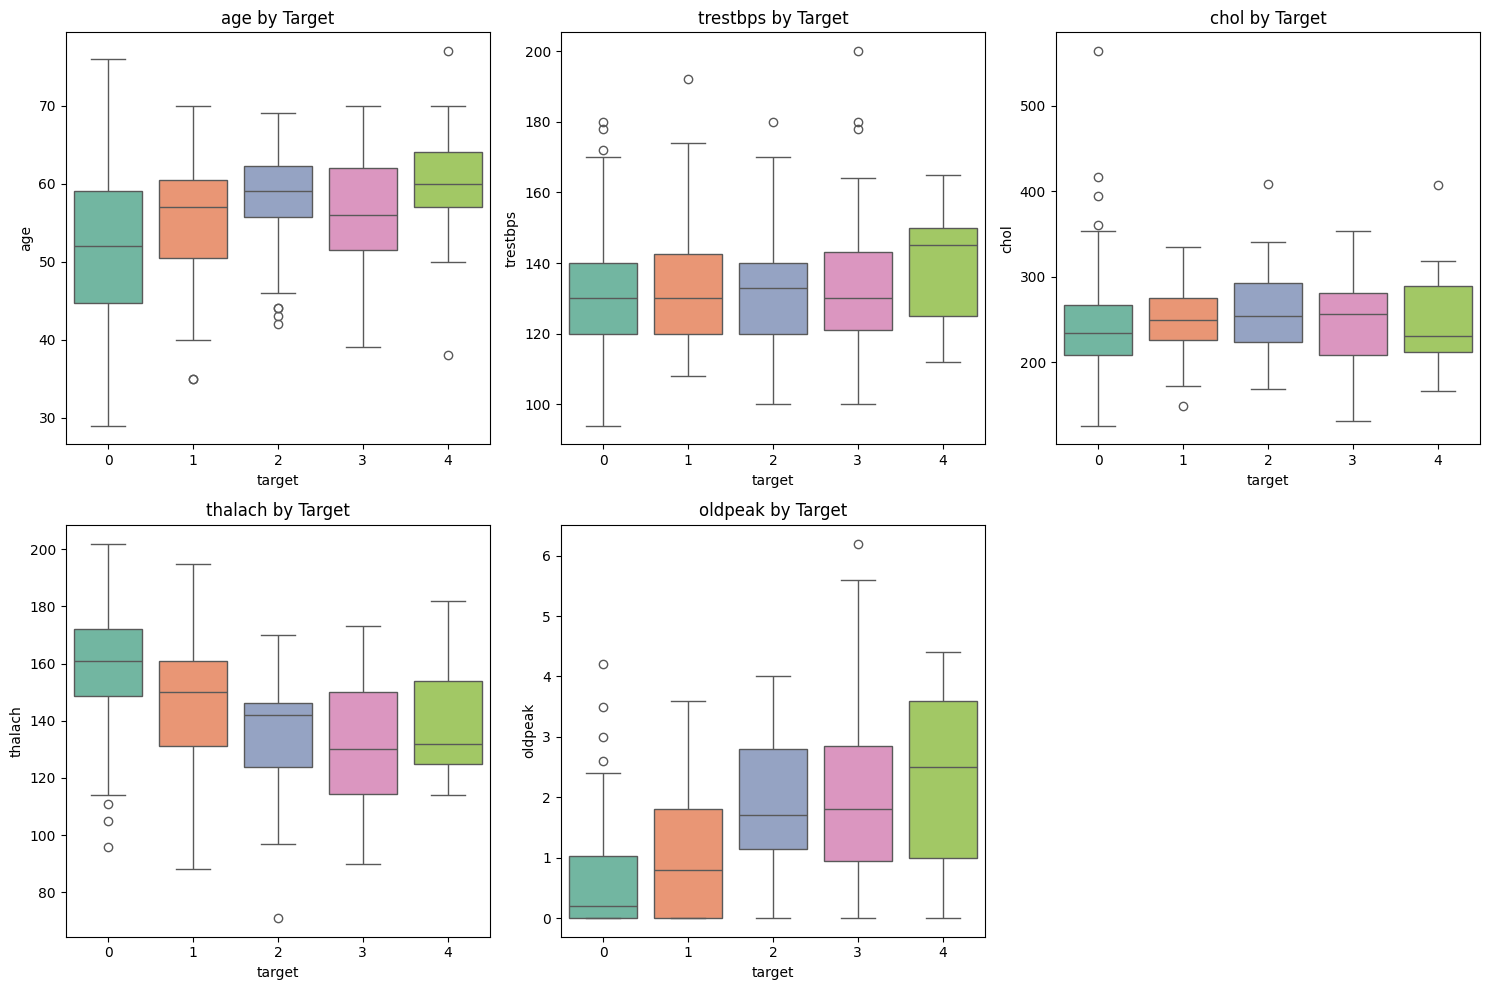

In [34]:
# 4️⃣ Boxplots by Target (disease vs no disease)
plt.figure(figsize=(15, 10))
for i, col in enumerate(["age", "trestbps", "chol", "thalach", "oldpeak"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="target", y=col, data=data, palette="Set2")
    plt.title(f"{col} by Target")
plt.tight_layout()
plt.show()

In [35]:
data.to_csv("cleaned_heart_disease.csv", index=False)
